# Exploratory Data Analysis EIA Energy Data

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import os

In [3]:
eia_df = pd.read_csv('../../data/eia_data_cleaned.csv')
eia_df.head(20)

,period,state,price,sales
0,2024-05-01,Alabama,14.73,2532.77
1,2024-05-01,Minnesota,15.69,1571.57
2,2024-05-01,Michigan,19.44,2477.25
3,2024-05-01,Massachusetts,28.70,1446.62
4,2024-05-01,Maryland,17.63,1858.94
5,2024-05-01,Maine,20.48,386.79
6,2024-05-01,Louisiana,11.49,2325.59
7,2024-05-01,Kentucky,12.94,1895.03
8,2024-05-01,Kansas,14.14,982.47
9,2024-05-01,Iowa,14.23,999.78


### Summary

In [4]:
summary_stats = eia_df.describe()
print(summary_stats)

             price          sales
count  2542.000000    2542.000000
mean     16.047290    5905.854866
std       6.056787   16079.972565
min       8.830000     138.420000
25%      12.260000     782.915000
50%      13.970000    2144.375000
75%      17.337500    4489.890000
max      45.590000  164276.580000


### Data Visualization

##### Distribution of Energy Prices

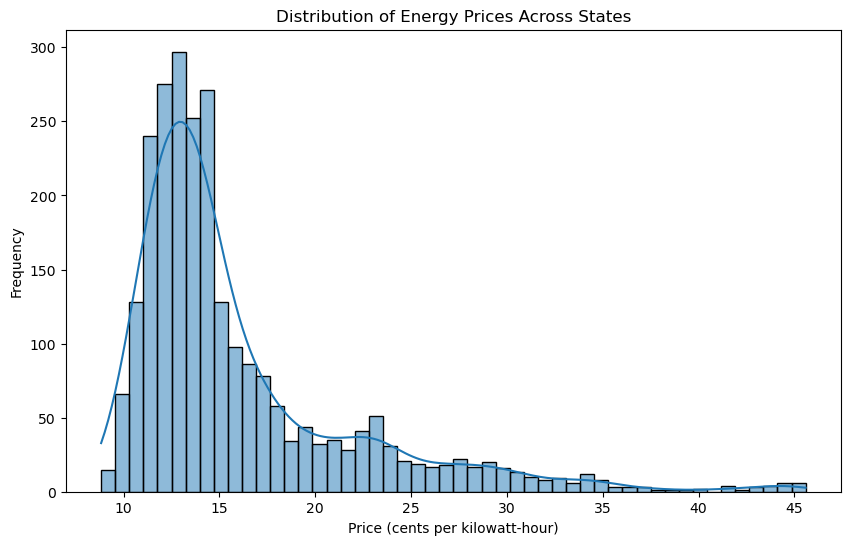

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(eia_df['price'], kde=True)
plt.title('Distribution of Energy Prices Across States')
plt.xlabel('Price (cents per kilowatt-hour)')
plt.ylabel('Frequency')
plt.show()

##### Energy Prices Over Time

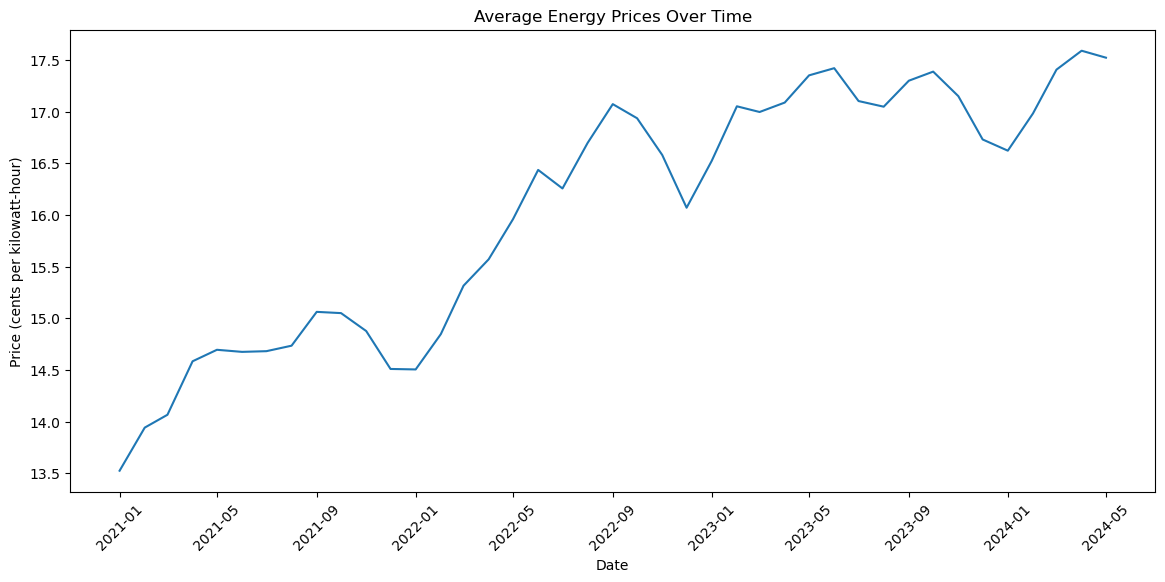

In [13]:
eia_df['period'] = pd.to_datetime(eia_df['period'])
eia_df.sort_values('period', inplace=True)
monthly_avg_price = eia_df.groupby('period')['price'].mean()
                   
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values)
plt.title('Average Energy Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (cents per kilowatt-hour)')
plt.xticks(rotation=45)
plt.show()

###### Notes
Showing an upward trend in average energy prices. There are also seasonal Flucuations as energy demand changes due to weather
This is an average across the nation, we can look at trends for each state

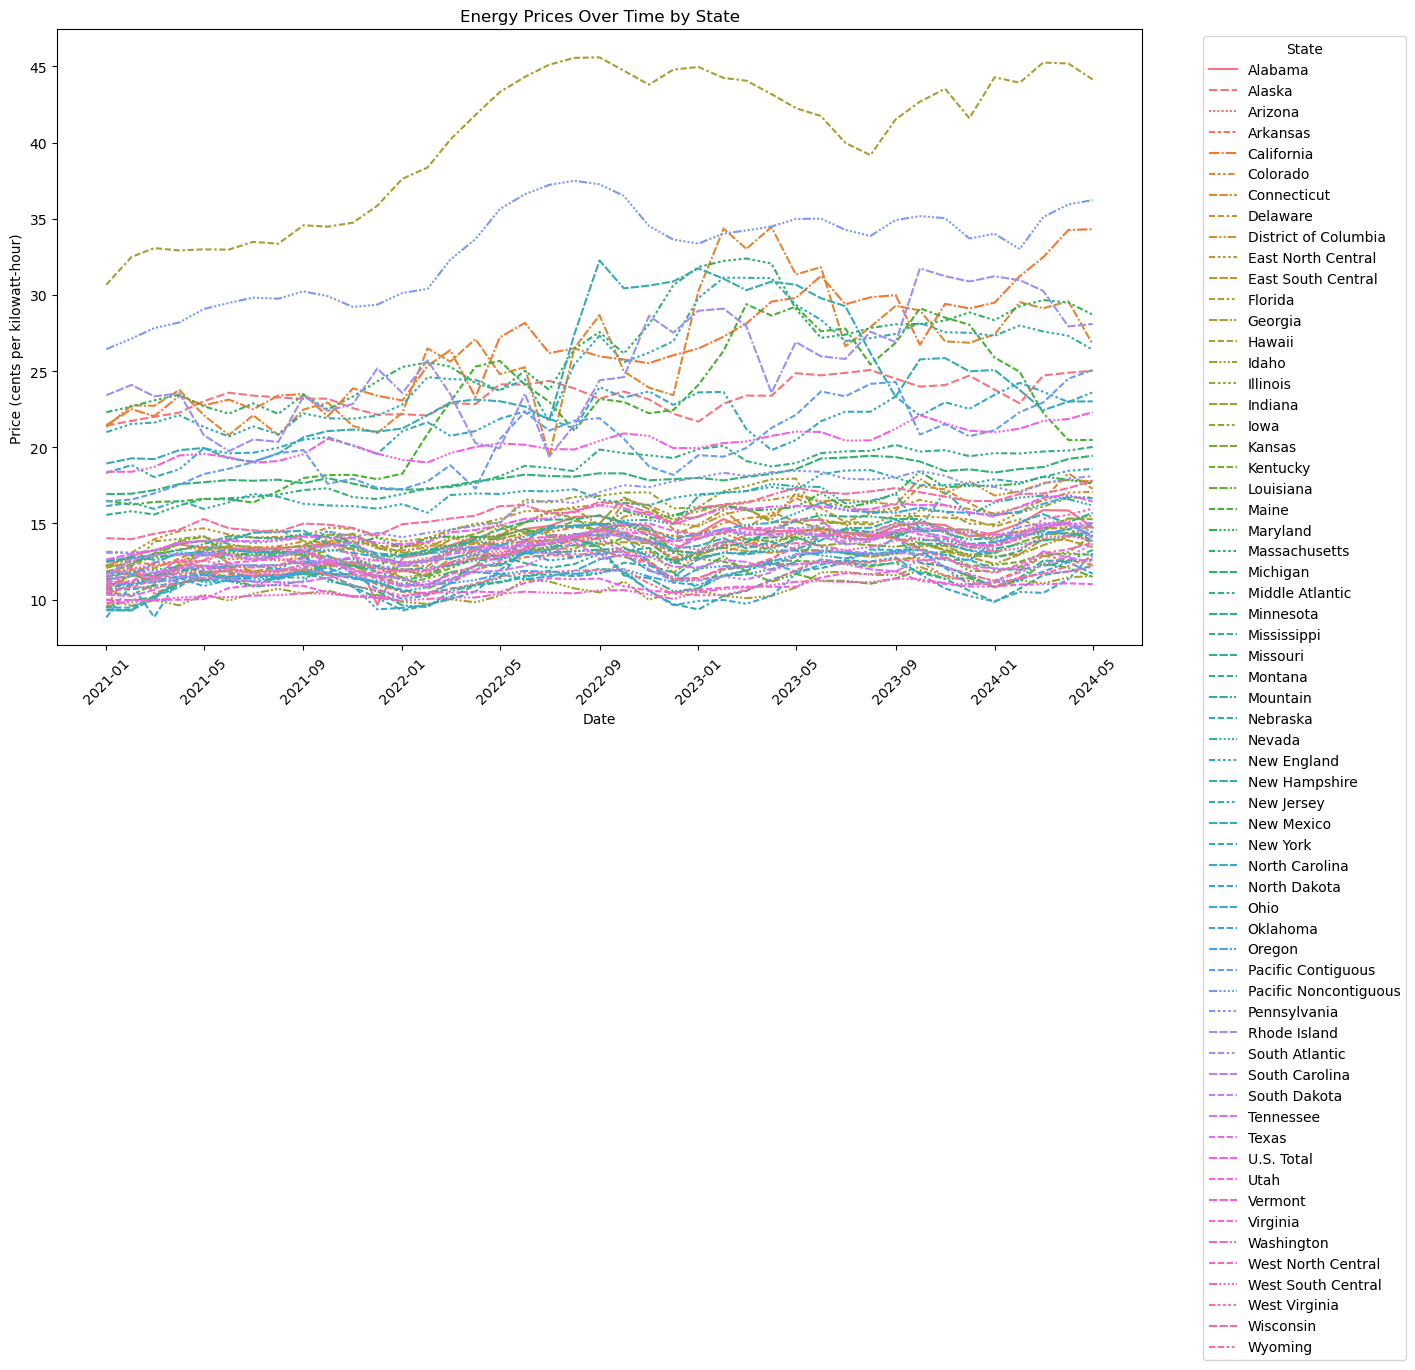

In [15]:
state_monthly_avg_price = eia_df.groupby(['state', 'period'])['price'].mean().unstack('state')
plt.figure(figsize=(14, 8))
sns.lineplot(data=state_monthly_avg_price)
plt.title('Energy Prices Over Time by State')
plt.xlabel('Date')
plt.ylabel('Price (cents per kilowatt-hour)')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Top States with Energy Prices. 

The above plot is difficult to read as all states are showing up on the graph. We will look into the top 25 states

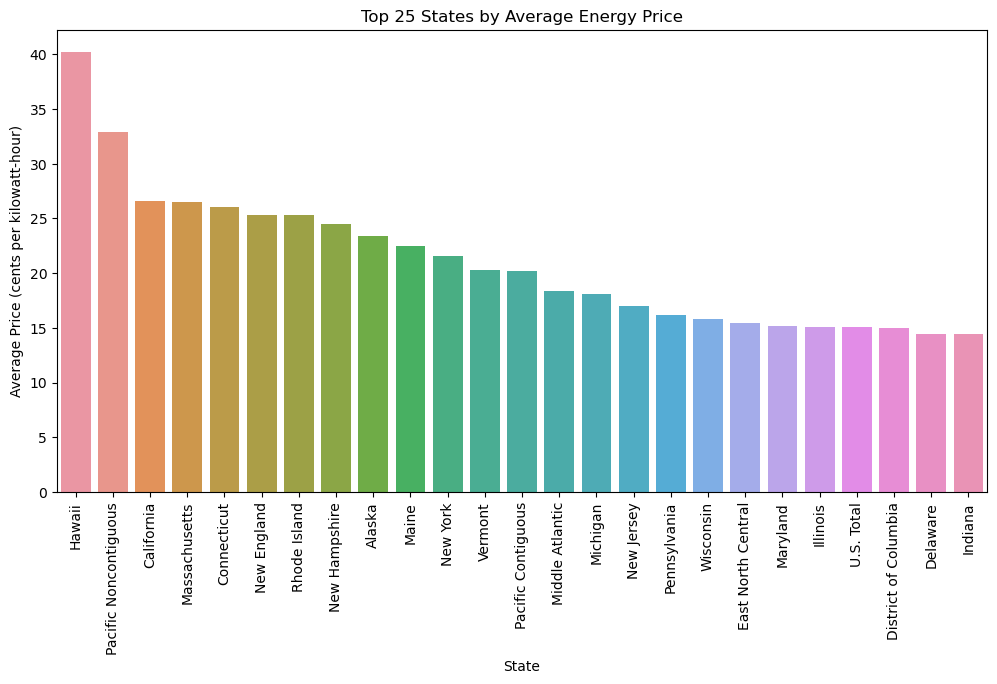

In [22]:
avg_price_by_state = eia_df.groupby('state')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_state.head(25).index, y=avg_price_by_state.head(25).values)
plt.title('Top 25 States by Average Energy Price')
plt.xlabel('State')
plt.ylabel('Average Price (cents per kilowatt-hour)')
plt.xticks(rotation=90)
plt.show()

### Correlation Analysis

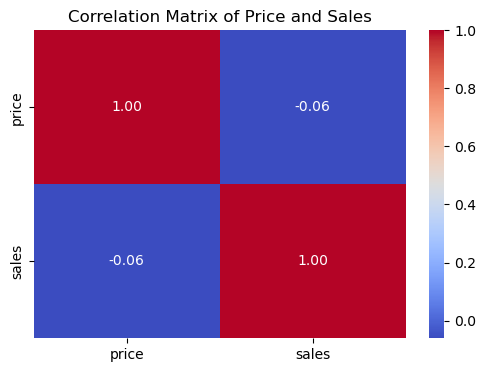

In [24]:
corr_matrix = eia_df[['price', 'sales']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Price and Sales')
plt.show()

Notes: Correlation is very week and there is no strong relationship between energy prices and total amount of energy sold. This is maily due to the energy demand being inelastic and consumption staying stable regardless of price changes. We've also noted that price trends have been increasing across the nation but we can focus on the top 25 states. 

It would be interesting to see how energy prices correlates with weather related factors so we can understand the potential drivers for solar energy adoption. 